In [ ]:
# import the Seaborn package for good data visualization.

%pip install seaborn

In [38]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 폰트 경로 설정
font_path = './NanumGothic.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

# 폰트 설정
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

import pandas as pd

In [39]:
# append the song data from nigerian-songs.csv.
# Load up a dataframe with some data about the songs. 

df = pd.read_csv("./도로교통공단_시군구별 월별 교통사고 통계_20221231.csv")
df.head()

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,65,0,15,61,13
1,서울,종로구,2,59,0,15,68,4
2,서울,종로구,3,70,0,19,60,9
3,서울,종로구,4,90,0,21,102,10
4,서울,종로구,5,88,1,20,98,12


In [40]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      2741 non-null   object
 1   시군구     2741 non-null   object
 2   발생월     2741 non-null   int64 
 3   사고건수    2741 non-null   int64 
 4   사망자수    2741 non-null   int64 
 5   중상자수    2741 non-null   int64 
 6   경상자수    2741 non-null   int64 
 7   부상신고자수  2741 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 171.4+ KB


In [41]:
df.isnull().sum()


시도        0
시군구       0
발생월       0
사고건수      0
사망자수      0
중상자수      0
경상자수      0
부상신고자수    0
dtype: int64

Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value



In [42]:
df.describe()


,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000,2741.000000
mean,6.501642,71.811748,0.997811,18.867202,77.500912,6.442174
std,3.450127,74.735424,1.286934,17.271635,84.193406,9.295437
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,18.000000,0.000000,7.000000,18.000000,1.000000
50%,7.000000,47.000000,1.000000,14.000000,50.000000,3.000000
75%,9.000000,97.000000,2.000000,24.000000,103.000000,9.000000
max,12.000000,484.000000,12.000000,113.000000,572.000000,79.000000


Text(0.5, 1.0, 'Top genres')

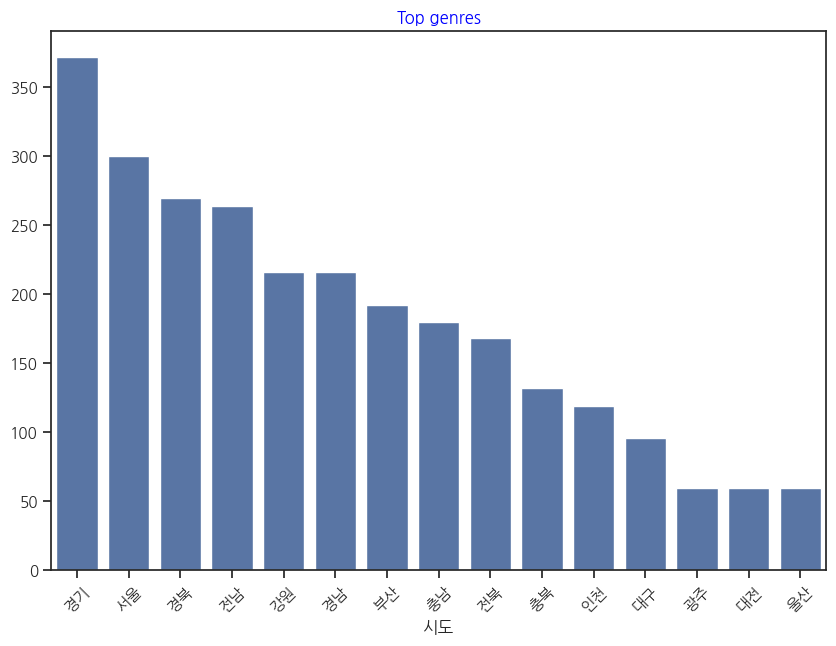

In [43]:
# use a barplot to find out the most popular genres

import seaborn as sns

top = df['시도'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:15].index,y=top[:15].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

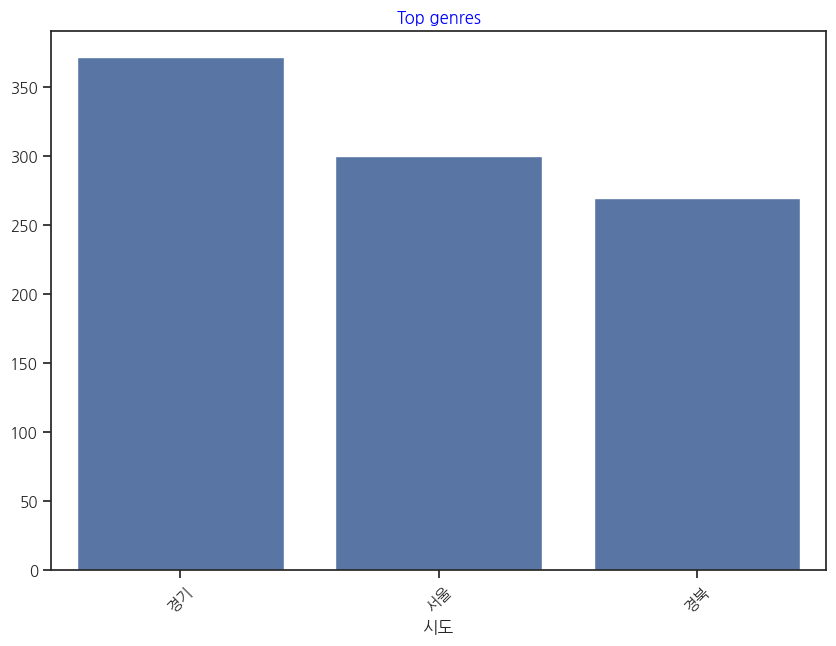

In [44]:
df = df[(df['시도'] == '서울') | (df['시도'] == '경기') | (df['시도'] == '경북')]
df = df[(df['사고건수'] > 0)]
top = df['시도'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

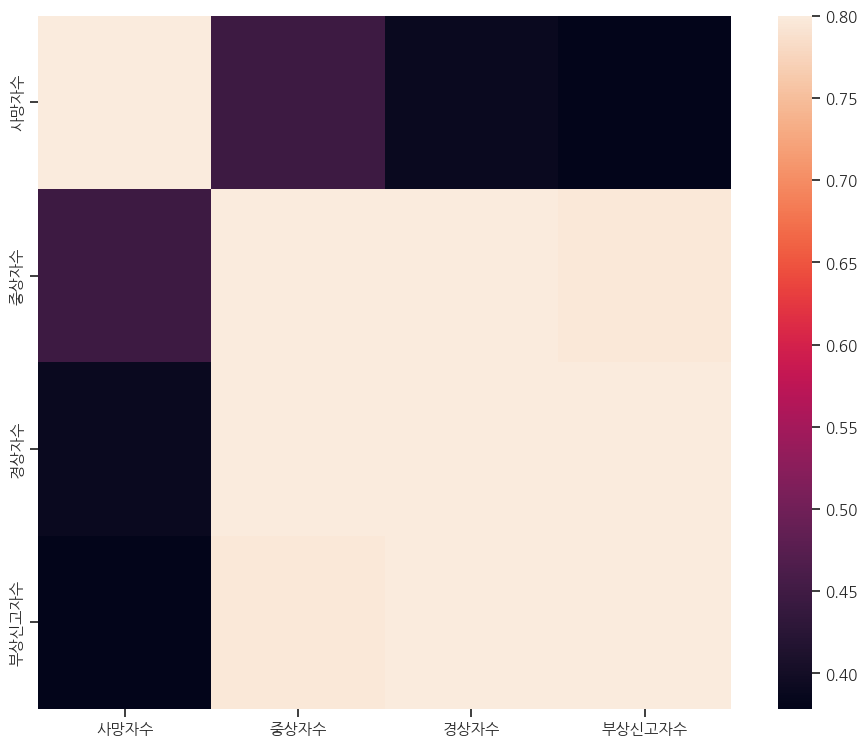

In [45]:
# do a quick test to see if the data correlates in any particularly strong way

df_modified = df.iloc[:, 4:]
corrmat = df_modified.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAEN

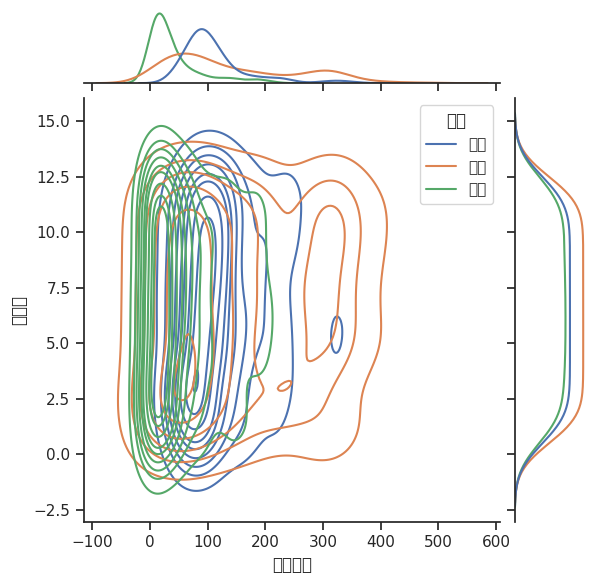

In [46]:

# examine our top three genres data distribution for popularity and danceability along a given x and y axis

import seaborn as sns

sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data = df,
    x="사고건수", y="발생월", hue="시도",
    kind="kde",
)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/h

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph

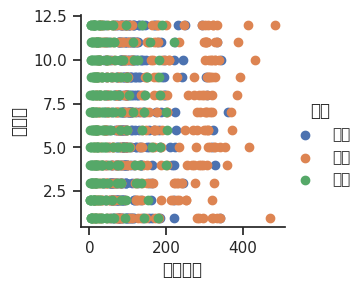

In [47]:
sns.FacetGrid(df, hue="시도") \
   .map(plt.scatter, "사고건수", "발생월") \
   .add_legend()

## 여기서부터 cluster2

<Axes: xlabel='부상신고자수'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

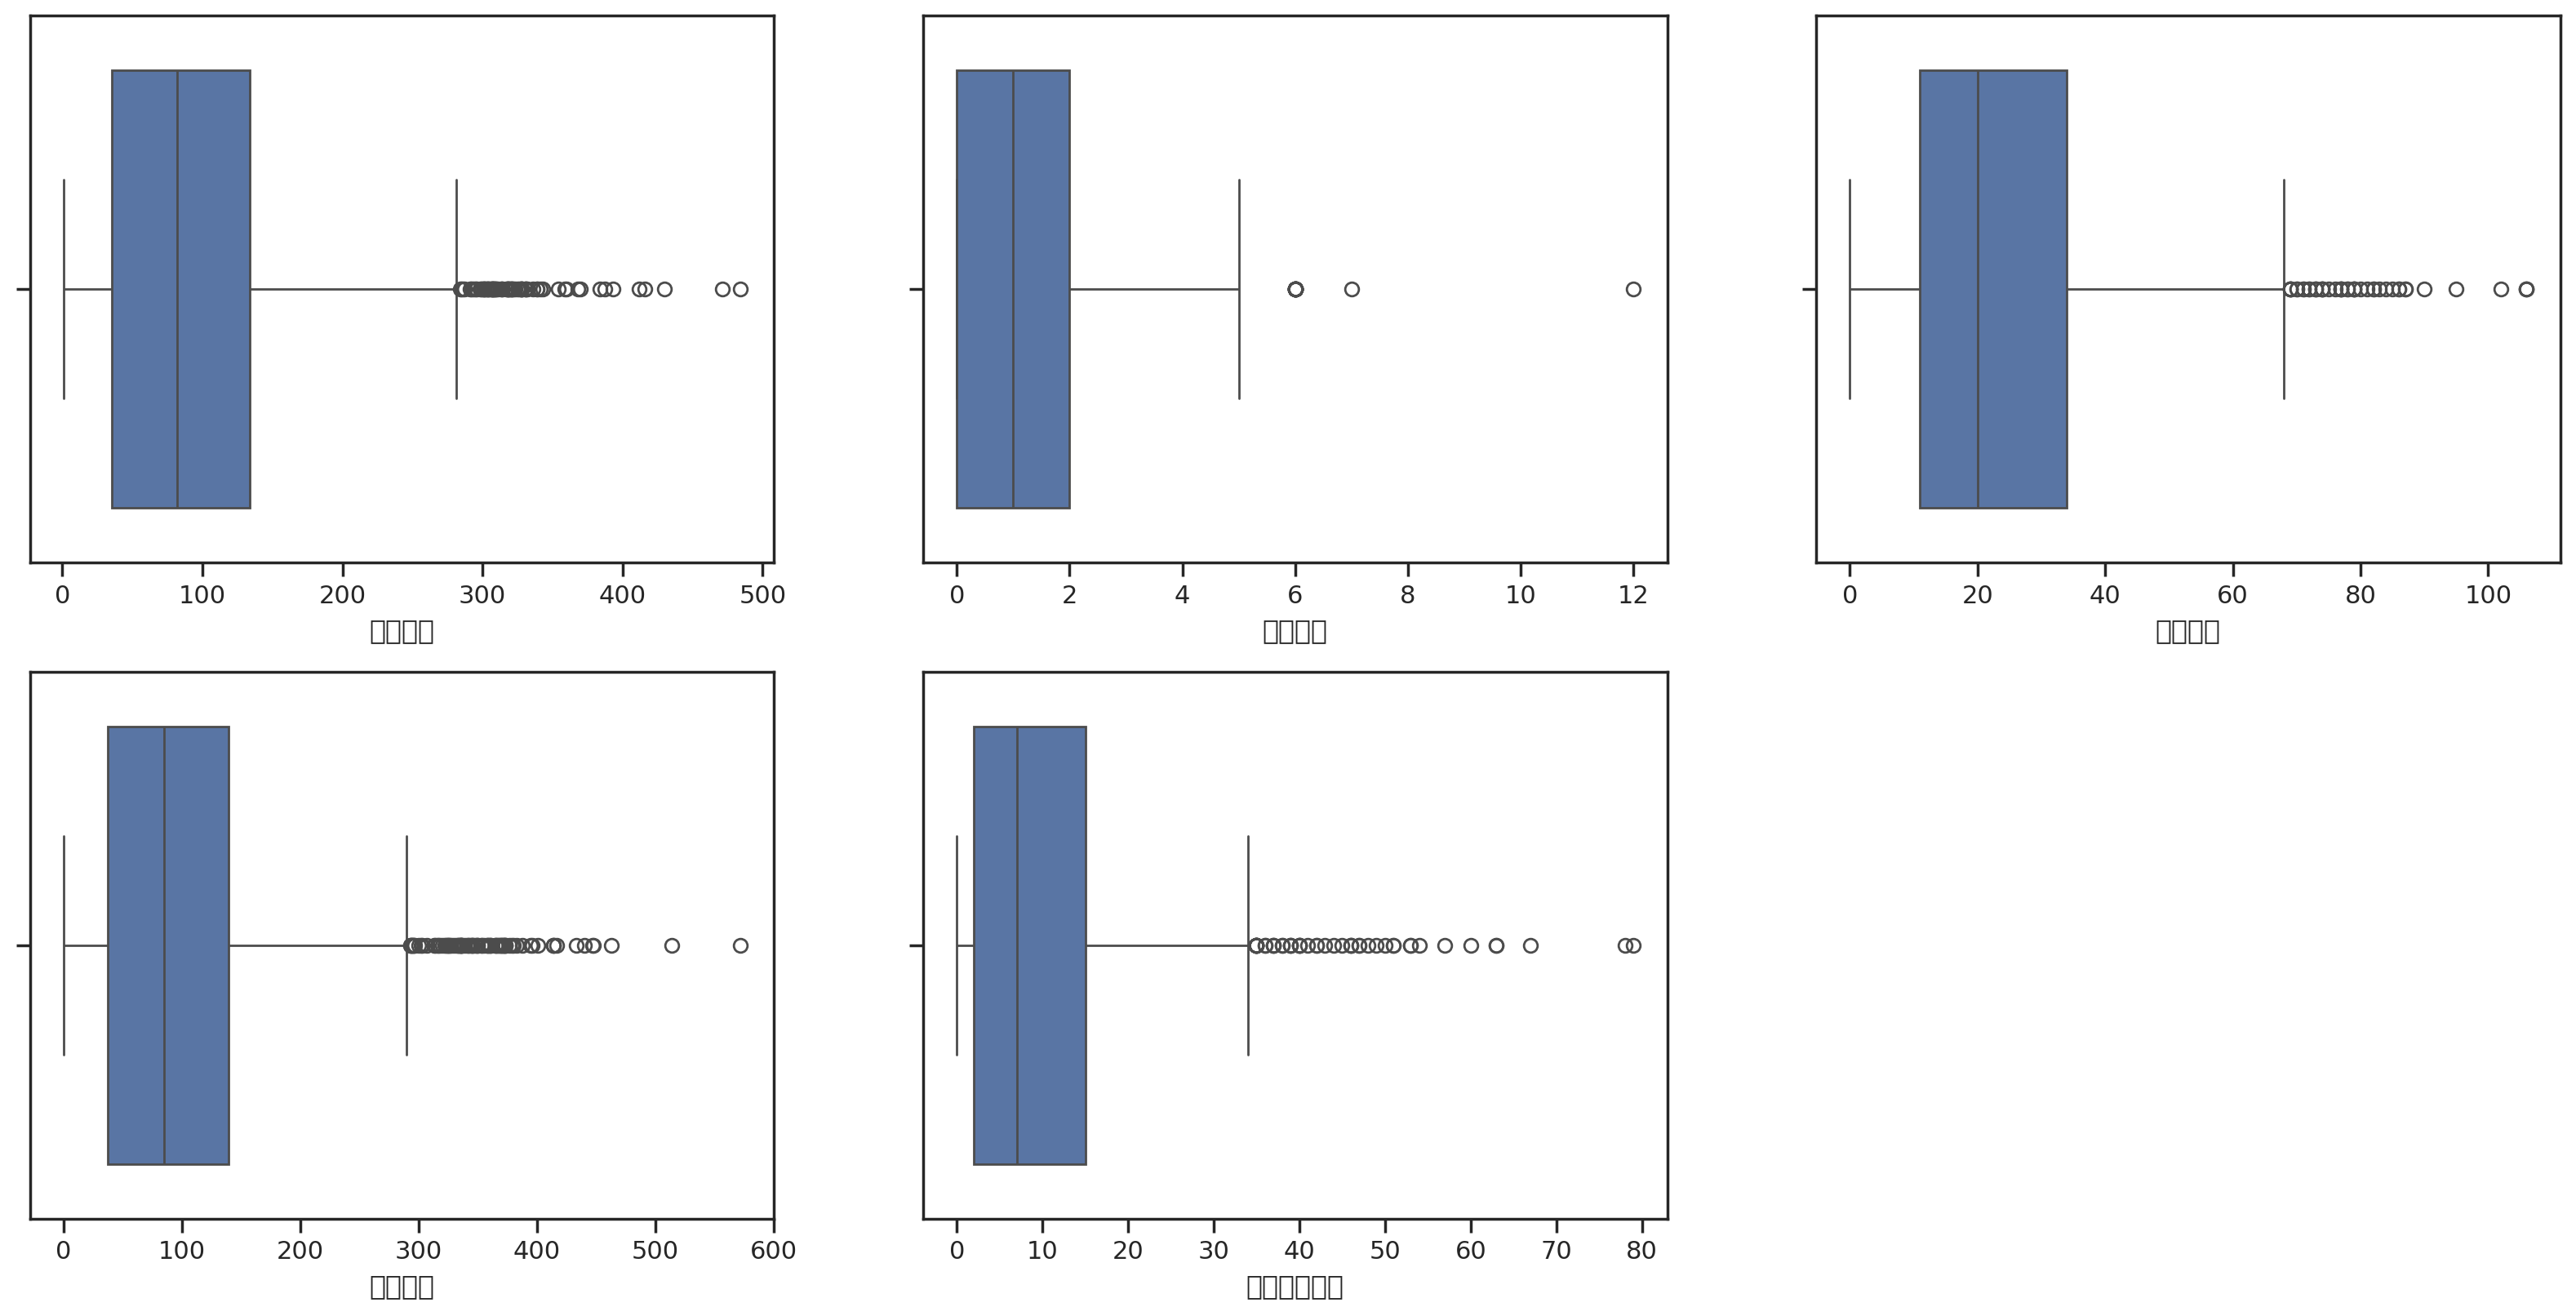

In [48]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = '사고건수', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = '사망자수', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = '중상자수', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = '경상자수', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = '부상신고자수', data = df)

In [49]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('시도','사고건수','발생월','사망자수','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)

KeyError: "['loudness', 'energy'] not in index"